# Heuristic Model for Titanic Dataset

In [1]:
# import packges 
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, accuracy_score, recall_score, precision_score

In [2]:
# load the titanic dataset
titanic = sns.load_dataset("titanic")

### Variables and Definitions
- **survived**: 0 = No, 1 = Yes
- **pclass**: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd, (1st = Upper, 2nd = Middle, 3rd = Lower)
- **sibsp**: the number of brothers, sisters, stepbrothers, stepsisters, husband and wife aboard the Titanic	
- **parch**: Number of Parents/Children Aboard, Some children travelled only with a nanny, therefore parch=0 for them	
- **ticket**: Ticket number	
- **fare**:	Passenger fare	
- **cabin**: Cabin number	
- **embarked**: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# Dataset head
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Cleaning Data

In [4]:
# rename some unclear columns
titanic = titanic.rename(columns = {'sex': 'gender', 'parch': 'parent', 'who':'passenger_type'}, inplace = False)

In [5]:
# drop the duplicate columns and unused column
titanic = titanic.drop(['pclass','alive','embarked','deck'], axis = 1)

In [6]:
# replacing missing values with mean for 'age' column
titanic['age'] = titanic['age'].replace(np.NaN, round(titanic['age'].mean()))

# Filling missing values using forward and backward fill for the 'embark_town' column
titanic["embark_town"] = titanic["embark_town"].fillna(method='ffill').fillna(method='bfill')

In [7]:
# check for the missing values
titanic.isnull().sum()

survived          0
gender            0
age               0
sibsp             0
parent            0
fare              0
class             0
passenger_type    0
adult_male        0
embark_town       0
alone             0
dtype: int64

In [8]:
# Dataset head
titanic.head()

,survived,gender,age,sibsp,parent,fare,class,passenger_type,adult_male,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,True,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,True,Southampton,True


# EDA

In [9]:
# general information of dataset
titanic.info()
titanic.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   survived        891 non-null    int64   
 1   gender          891 non-null    object  
 2   age             891 non-null    float64 
 3   sibsp           891 non-null    int64   
 4   parent          891 non-null    int64   
 5   fare            891 non-null    float64 
 6   class           891 non-null    category
 7   passenger_type  891 non-null    object  
 8   adult_male      891 non-null    bool    
 9   embark_town     891 non-null    object  
 10  alone           891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(3)
memory usage: 58.5+ KB


(891, 11)

In [10]:
# describe all the numerical columns
titanic.describe()

,survived,age,sibsp,parent,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.758889,0.523008,0.381594,32.204208
std,0.486592,13.002570,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# describe all the categorical columns
titanic.describe(include='object')

,gender,passenger_type,embark_town
count,891,891,891
unique,2,3,3
top,male,man,Southampton
freq,577,537,644


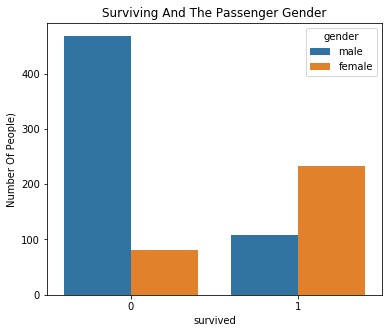

In [12]:
# the size of our plot
plt.figure(figsize=(6,5))

# plot Surviving And The Passenger Gender
sns.countplot(x = "survived",data=titanic,hue="gender")

# plot title and y axis label
plt.title('Surviving And The Passenger Gender')
plt.ylabel('Number Of People)');

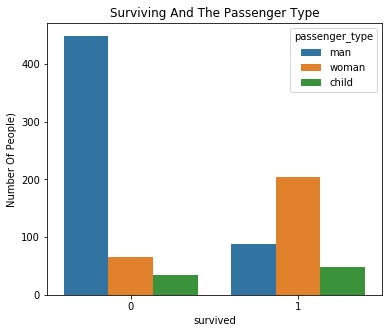

In [13]:
# the size of our plot
plt.figure(figsize=(6,5))

# Surviving And The Passenger Type 
sns.countplot(x = "survived",data=titanic,hue="passenger_type")

# plot title and y axis label
plt.title('Surviving And The Passenger Type')
plt.ylabel('Number Of People)');

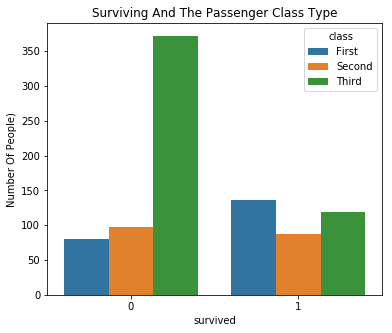

In [14]:
# the size of our plot
plt.figure(figsize=(6,5))

# plot Surviving And The Passenger Class Type
sns.countplot(x = "survived",data=titanic,hue="class")

# plot title and y axis label
plt.title('Surviving And The Passenger Class Type')
plt.ylabel('Number Of People)');

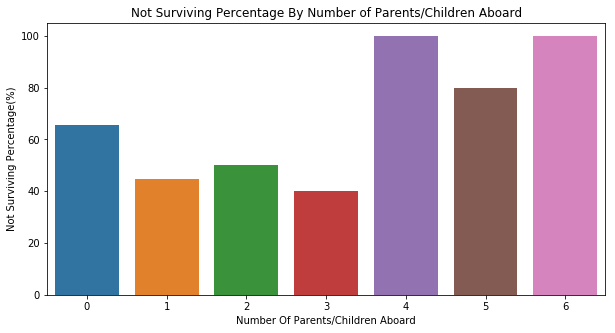

In [15]:
# the size of our plot
plt.figure(figsize=(10,5))

# plot Not Surviving Percentage by number of parents/Children Aboard
sns.barplot(x=(titanic[titanic["survived"] == 0])["parent"].value_counts().sort_index().index,
            y=((titanic[titanic["survived"] == 0])["parent"].value_counts().sort_index().values/(titanic["parent"].value_counts().sort_index().values))*100,
            data= titanic[titanic["survived"] == 0])

# plot title and x, y axis labels                                                
plt.title("Not Surviving Percentage By Number of Parents/Children Aboard");
plt.xlabel('Number Of Parents/Children Aboard')
plt.ylabel('Not Surviving Percentage(%)');

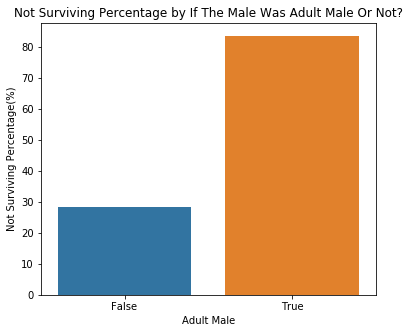

In [16]:
# the size of our plot
plt.figure(figsize=(6,5))

# plot Not Surviving Percentage by Adult Male
sns.barplot(x=(titanic[titanic["survived"] == 0])["adult_male"].value_counts().sort_index().index,
            y=((titanic[titanic["survived"] == 0])["adult_male"].value_counts().sort_index().values/(titanic["adult_male"].value_counts().sort_index().values))*100,
            data= titanic[titanic["survived"] == 0])
 
# plot title and x, y axis labels    
plt.title("Not Surviving Percentage by If The Male Was Adult Male Or Not?");
plt.xlabel('Adult Male')
plt.ylabel('Not Surviving Percentage(%)');

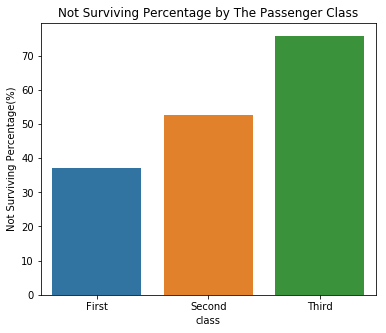

In [17]:
# the size of our plot
plt.figure(figsize=(6,5))

# Not Surviving Percentage by The Passenger Class
sns.barplot(x=(titanic[titanic["survived"] == 0])["class"].value_counts().sort_index().index,
            y=((titanic[titanic["survived"] == 0])["class"].value_counts().sort_index().values/(titanic["class"].value_counts().sort_index().values))*100,
            data= titanic[titanic["survived"] == 0])

# plot title and x, y axis labels
plt.title("Not Surviving Percentage by The Passenger Class");
plt.xlabel('class')
plt.ylabel('Not Surviving Percentage(%)');

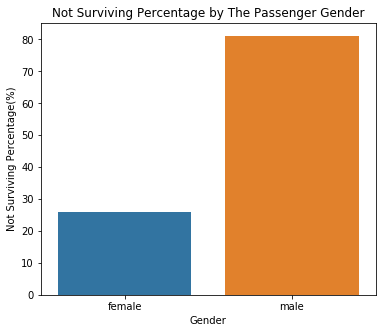

In [18]:
# the size of our plot
plt.figure(figsize=(6,5))

# plot Not Surviving Percentage by The Passenger Gender
sns.barplot(x=(titanic[titanic["survived"] == 0])["gender"].value_counts().sort_index().index,
            y=((titanic[titanic["survived"] == 0])["gender"].value_counts().sort_index().values/(titanic["gender"].value_counts().sort_index().values))*100,
            data= titanic[titanic["survived"] == 0])

# plot title and x, y axis labels                                                
plt.title("Not Surviving Percentage by The Passenger Gender");
plt.xlabel('Gender')
plt.ylabel('Not Surviving Percentage(%)');

In [19]:
# drop unwanted ages to calculate the not surviving percentage by age
titanic_age = titanic.set_index("age").drop([0.42, 0.67, 0.75, 0.83, 0.92,5,12,13,53,63,80])

In [20]:
# restet the index of the new dataframe
titanic_age = titanic_age.reset_index()

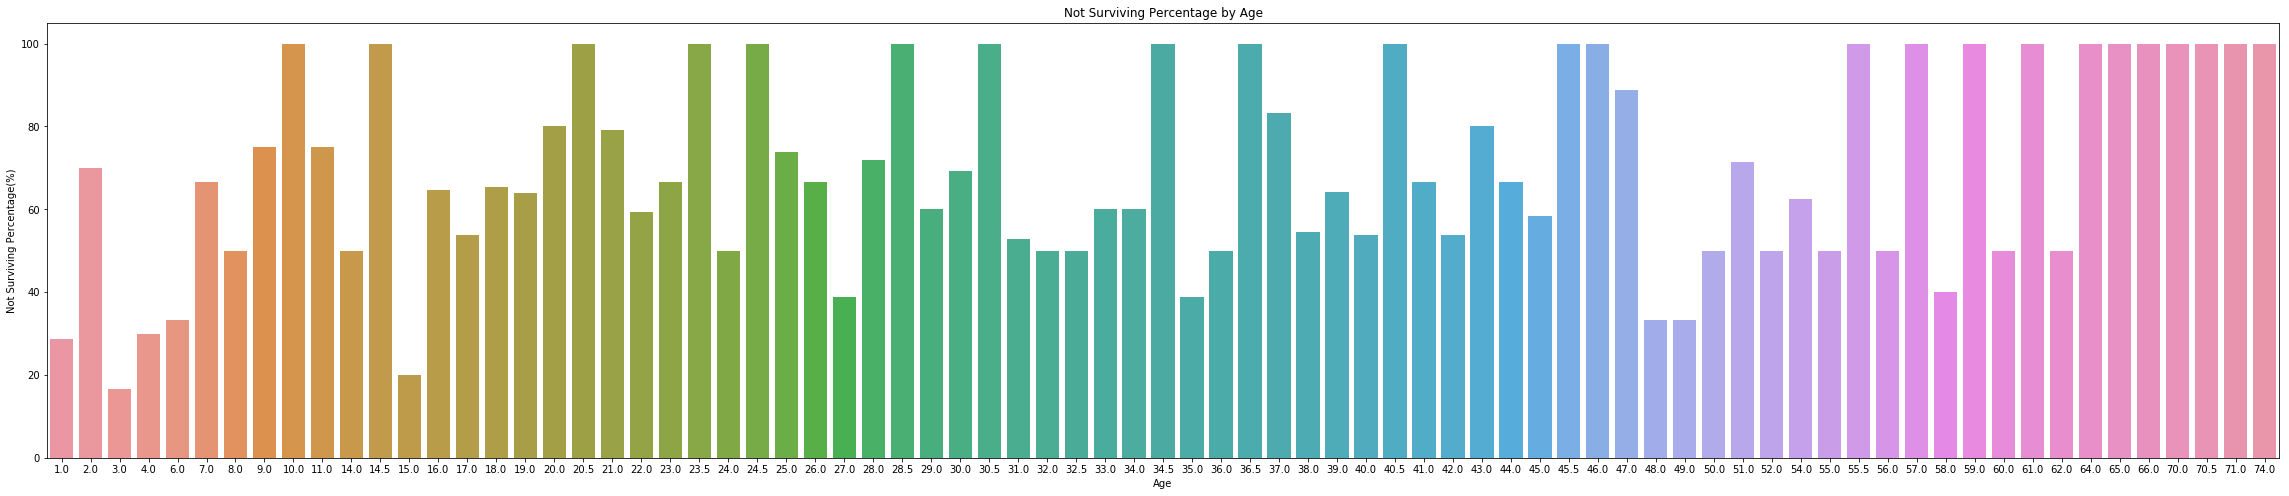

In [21]:
# the size of our plot
plt.figure(figsize=(40,8))

# plot Not Surviving Percentage by The Passenger Age
sns.barplot(x=(titanic[titanic["survived"] == 0])["age"].value_counts().sort_index().index,
            y=((titanic[titanic["survived"] == 0])["age"].value_counts().sort_index().values/(titanic_age["age"].value_counts().sort_index().values))*100,
            data= titanic[titanic["survived"] == 0])

# plot title and x, y axis labels
plt.title("Not Surviving Percentage by Age");
plt.xlabel('Age')
plt.ylabel('Not Surviving Percentage(%)');

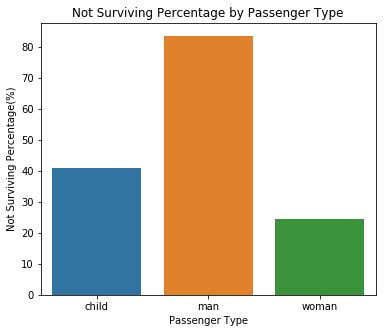

In [22]:
# the size of our plot
plt.figure(figsize=(6,5))

# plot Not Surviving Percentage by Passenger Type
sns.barplot(x=(titanic[titanic["survived"] == 0])["passenger_type"].value_counts().sort_index().index,
            y=((titanic[titanic["survived"] == 0])["passenger_type"].value_counts().sort_index().values/(titanic["passenger_type"].value_counts().sort_index().values))*100,
            data= titanic[titanic["survived"] == 0])
                                                
# plot title and x, y axis labels
plt.title("Not Surviving Percentage by Passenger Type");
plt.xlabel('Passenger Type')
plt.ylabel('Not Surviving Percentage(%)');

# Split The Dataset

##### (80/20 split)

In [23]:
# Separate the data set into training and testing. (80/20 split)

training, testing = train_test_split(
    titanic, 
    train_size=0.8, # 80% of data to train
    test_size=0.2) # 20% of data to test

##### (70/30 split)

In [24]:
# Separate the data set into training and testing. (70/30 split)

training, testing = train_test_split(
    titanic, 
    train_size=0.7, # 70% of data to train
    test_size=0.3) # 30% of data to test

In [25]:
# baseline model (Majority Class)
titanic["survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [26]:
# Check class labels distribution in testing
testing["survived"].value_counts(normalize=True)

0    0.585821
1    0.414179
Name: survived, dtype: float64

In [27]:
# Check class labels distribution in training
training["survived"].value_counts(normalize=True)

0    0.629213
1    0.370787
Name: survived, dtype: float64

# Classification Heuristic Model
### The First Heuristic Model

In [28]:
# Building the classification Heuristic model

# Create function to perform classification heuristic model
def classification_model(df):
    
    """
    if number of parents = 0 or 4 or 5 or 6 then predict survived = 0,
    if alone = True then predict survived = 0,
    if adult_male = True then predict survived = 0,
    if gender = male then predict survived = 0,
    if passenger_type = man then predict survived = 0,
    if embark town = Queenstown or Southampton then predict survived = 0,
    if class = Third then predict survived = 0,
    if age = (2, 7, 9, 11, 16, 18, 19, 20, 21, 22, 23, 25, 26, 28, 29, 30, 33, 34, 37, 38, 39, 41, 43, 44, 45,
    51, 54, 62,10, 14.5, 20.5, 23.5, 24.5, 28.5, 30.5, 34.5, 36.5, 40.5, 45.5,46, 55.5,57, 59, 61, 64, 65, 66,
    70, 70.5,71,74) then predict survived = 0
    
    """
    # initial empty lists
    preds = []
    
    # for-loop to iterate through the whole dataset
    # x is the row for each passenger
    for x in range(len(df)):
        # if number of parents = 0 or 4 or 5 or 6 then predict the passenger will not survive
        if (titanic.iloc[x]["parent"] > 3 | titanic.iloc[x]["parent"] == 0):
            preds.append(0)
        
        # if alone = True then predict the passenger will not survive
        elif titanic.iloc[x]["alone"] == True:
            preds.append(0)
        
        # if adult_male = True then predict the passenger will not survive
        elif titanic.iloc[x]["adult_male"] == True:
            preds.append(0)
        
        # if gender = male then predict the passenger will not survive
        elif titanic.iloc[x]["gender"] == 'male':
            preds.append(0)

        # if passenger_type = man then predict the passenger will not survive
        elif titanic.iloc[x]["passenger_type"] == 'man':
            preds.append(0)
        
        # if class = Third then predict the passenger will not survive
        elif titanic.iloc[x]["class"] == 'Third' or titanic.iloc[x]["class"] == 'Second':
            preds.append(0)
        
         # if embark town = Queenstown or  Southampton then predict the passenger will not survive
        elif titanic.iloc[x]["embark_town"] == 'Southampton' or titanic.iloc[x]["embark_town"] == 'Queenstown':
            preds.append(0)
            
        # if age = (2, 7, 9, 11, 16, 18, 19, 20, 21, 22, 23, 25, 26, 28, 29, 30, 33, 34, 37, 38, 39, 41, 43, 44, 45,
        # 51, 54, 62,10, 14.5, 20.5, 23.5, 24.5, 28.5, 30.5, 34.5, 36.5, 40.5, 45.5, 46, 55.5,57, 59, 61, 64, 65, 66,
        # 70, 70.5, 71, 74) then predict the passenger will not survive
        elif (titanic.iloc[x]["age"] == 2 or titanic.iloc[x]["age"] == 7 or 
              (titanic.iloc[x]["age"] > 8 and titanic.iloc[x]["age"] < 12 )or
              titanic.iloc[x]["age"] == 14.5 or titanic.iloc[x]["age"] == 16 or 
              (titanic.iloc[x]["age"] > 17 and titanic.iloc[x]["age"] < 24) or
              titanic.iloc[x]["age"] == 25 or titanic.iloc[x]["age"] == 26 or 
              (titanic.iloc[x]["age"] > 27 and titanic.iloc[x]["age"] < 31) or 
              (titanic.iloc[x]["age"] > 33 and titanic.iloc[x]["age"] < 35) or
              (titanic.iloc[x]["age"] > 36 and titanic.iloc[x]["age"] < 40) or
              titanic.iloc[x]["age"] == 40.5 or titanic.iloc[x]["age"] == 41 or 
              (titanic.iloc[x]["age"] > 42 and titanic.iloc[x]["age"] < 47) or
              titanic.iloc[x]["age"] == 51 or titanic.iloc[x]["age"] == 54 or
              titanic.iloc[x]["age"] == 55.5 or titanic.iloc[x]["age"] == 57 or
              titanic.iloc[x]["age"] == 59 or titanic.iloc[x]["age"] == 61 or
              titanic.iloc[x]["age"] == 62 or (titanic.iloc[x]["age"] > 63 and
              titanic.iloc[x]["age"] < 80)):
            preds.append(0)
            
        
        # if else then predict the passenger will survive
        else:
            preds.append(1)
    
    # return the list
    return preds

### The Second Heuristic Model

In [29]:
# Building the classification Heuristic model

# Create function to perform classification heuristic model
def classification_model(df):
    
    """
    Simple heuristic:
    if gender = female, then predict survived = 1, 
    else the passenger will not survived
    """
    # initial empty lists
    preds = []
    
    # for-loop to iterate through the whole dataset
    # x is the row for each passenger
    for x in range(len(df)):
        # if gender = female then predict the passenger will survive
        if titanic.iloc[x]["gender"] == 'female':
            preds.append(1)
        else:
            preds.append(0)
    
    # return the list
    return preds

### The Third Heuristic Model

In [30]:
# Building the classification Heuristic model

# Create function to perform classification heuristic model
def classification_model(df):
    
    """
    Simple heuristic:
    if gender = female, then predict survived = 1, 
    if gender = male, then predict survived = 0,
    if gender = female & class = Third & embark_town = Southampton & fare > 8, then predict survived = 0, 
    else the passenger will not survived
    """
    # initial empty lists
    preds = []
    
    # for-loop to iterate through the whole dataset
    # x is the row for each passenger
    for x in range(len(df)):
        # if gender = male then predict the passenger will not survive
        if titanic.iloc[x]["gender"] == 'female':
            preds.append(1)
            
        elif titanic.iloc[x]["gender"] == 'male':
            preds.append(0)
            
        # if gender = male then predict the passenger will not survive
        elif titanic.iloc[x]["gender"] == 'female' & titanic.iloc[x]["class"] == 'Third' & titanic.iloc[x]["embark_town"] == 'Southampton' & titanic.iloc[x]["fare"] > 8 :
            preds.append(0)
            
        # if else then predict the passenger will survive
        else:
            preds.append(0)
    
    # return the list
    return preds

### The Fourth Heuristic Model

In [31]:
# Building the classification Heuristic model

# Create function to perform classification heuristic model
def classification_model(df):
    
    """
    Simple heuristic:
    if gender = female & class = Third & age < 15, then predict survived = 1, 
    else the passenger will not survived
    """
    # initial empty lists
    preds = []
    
    # for-loop to iterate through the whole dataset
    # x is the row for each passenger
    for x in range(len(df)):
        # if gender = male then predict the passenger will not survive
        if ((titanic.iloc[x]["gender"]=='female') & (titanic.iloc[x]["class"]=='Third') & (titanic.iloc[x]["age"]<15)):
            preds.append(1)
            
        # if else then predict the passenger will survive
        else:
            preds.append(0)
    
    # return the list
    return preds

In [32]:
# add the 'survived_preds' column to the dataframe
testing['survived_preds'] = classification_model(testing)

## Classification Cost Function

In [33]:
# create a function that calculate the the Precision, Recall and Accuracy for the classification heuristic model
# for the 'survived' column
# y_test_c is the actual values
# y_pred_c is the predicted  values
def classification_model_evaluation(y_test_c, y_pred_c):
    
    # calculate the scores from sklearn.metrics package
    accuracy  = accuracy_score(y_test_c, y_pred_c)
    precision = precision_score(y_test_c, y_pred_c)
    recall    = recall_score(y_test_c, y_pred_c)
    
    # return the scores
    return "Accuracy Score = {val1}, Precision Score = {val2} , Recall Score = {val3} ".format(val1 = accuracy, val2 = precision, val3 = recall)

In [34]:
classification_model_evaluation(testing["survived"],testing["survived_preds"])

'Accuracy Score = 0.5671641791044776, Precision Score = 0.2727272727272727 , Recall Score = 0.02702702702702703 '

# Heuristic Models Scores

### The First Heuristic Model
- 80 - 20 split

Accuracy Score = 0.5957820738137083, Precision Score = 0.625 , Recall Score = 0.021551724137931036
- 70 - 30 split

Accuracy Score = 0.6455223880597015, Precision Score = 0.5 , Recall Score = 0.010526315789473684


### The Second Heuristic Model
- 80 - 20 split

Accuracy Score = 0.5043936731107206, Precision Score = 0.375 , Recall Score = 0.3391304347826087
- 70 - 30 split

Accuracy Score = 0.5401606425702812, Precision Score = 0.42245989304812837 , Recall Score = 0.395


### The Third Heuristic Model
- 80 - 20 split

Accuracy Score = 0.5289982425307557, Precision Score = 0.40384615384615385 , Recall Score = 0.3684210526315789
- 70 - 30 split

Accuracy Score = 0.5401606425702812, Precision Score = 0.42245989304812837 , Recall Score = 0.395


### The Fourth Heuristic Model
- 80 - 20 split

Accuracy Score = 0.5922671353251318, Precision Score = 0.5217391304347826 , Recall Score = 0.05150214592274678
- 70 - 30 split

Accuracy Score = 0.5983935742971888, Precision Score = 0.47368421052631576 , Recall Score = 0.04522613065326633 

# Logistic Regression model

In [35]:
# load the titanic dataset
titanic = sns.load_dataset("titanic").dropna()

# split the titanic dataset
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(titanic.drop(["survived", "alive", "adult_male"], axis=1), titanic["survived"])

# Logistic Regression model
pipe_c = make_pipeline(ce.OrdinalEncoder(), StandardScaler(), LogisticRegression()).fit(x_train_c, y_train_c)

# predict 'survived' column
y_pred_c = pipe_c.predict(x_test_c)

# print the scores
print("Recall Score: ",recall_score(y_test_c, y_pred_c))
print("Precision Score: ",precision_score(y_test_c, y_pred_c))
print("Accuracy Score: ",accuracy_score(y_test_c, y_pred_c))

Recall Score:  0.9629629629629629
Precision Score:  0.7878787878787878
Accuracy Score:  0.8260869565217391


# Heuristic Model for Tips Dataset

In [36]:
# Answered

#  Regression Model on tips model

tips_data = sns.load_dataset("tips").dropna()

x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(tips_data.drop("total_bill", axis=1), tips_data["total_bill"])

pipeline = make_pipeline(ce.OrdinalEncoder(), StandardScaler() , LinearRegression()).fit(x_train_r, y_train_r)


y_pred_r = pipeline.predict(x_test_r)


In [37]:
# Cost Functions for the Linear Regression (Tips)

print("MSE: ", mean_squared_error(y_test_r, y_pred_r))
print("MAE: ",mean_absolute_error(y_test_r, y_pred_r))
print("RMSE: ",mean_squared_error(y_test_r, y_pred_r, squared=False))

MSE:  31.755299824130294
MAE:  4.20578334829971
RMSE:  5.635184098512691


In [38]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


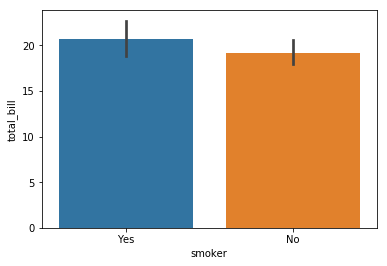

In [39]:
#Inspecting Dataset to come up with an assumption to build the Heuristic Model

# inspect smoking, sex of the people vs. the total bill they pay

sns.barplot(x="smoker", y = 'total_bill', data = tips_data)

# Conclusion: Smoking feature is irrelevent 

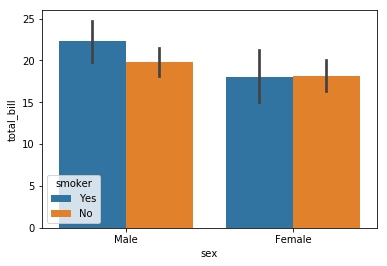

In [40]:

sns.barplot(x="sex", y = 'total_bill', hue = "smoker", data = tips_data)

# Conclusion: Sex and Smoking feature are irrelevent 

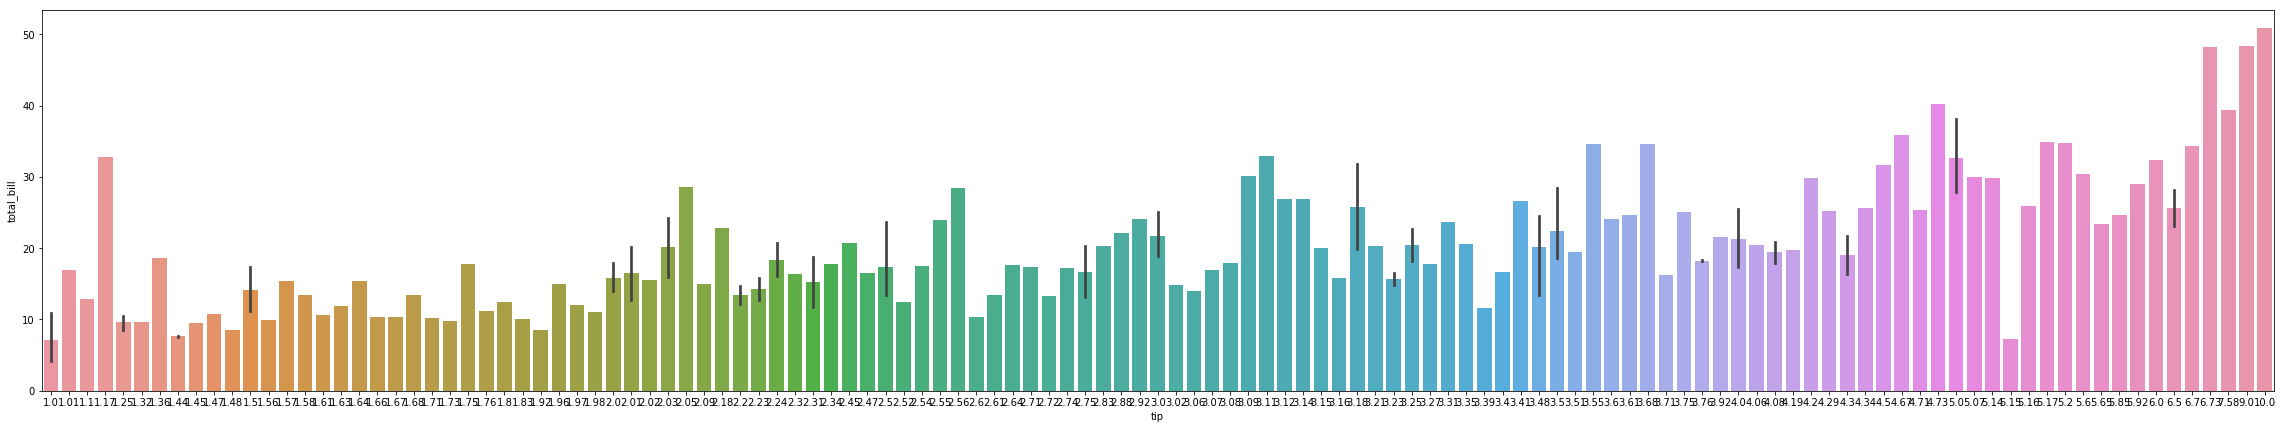

In [41]:

f, a = plt.subplots(figsize=(40, 7))

sns.barplot(ax = a, x="tip", y = 'total_bill', data = tips_data)

# we can see that the higher tips correlates with higher bill, but it is more effective at higher tips 

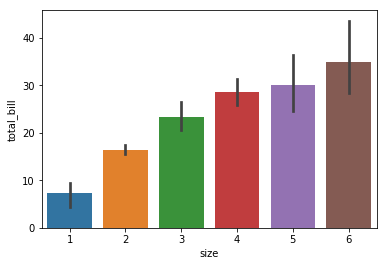

In [42]:
sns.barplot(x="size", y = 'total_bill', data = tips_data)

# Found it! Size is very correlated with the total bill

In [43]:
# Getting the trained Linear Regression Model Weights to help us get a good Heuristic Model

pipeline.named_steps['linearregression'].coef_

# as we see the size and the tip features have the larget weights/coefficients, then we can use this value
# to build a heurtistic models

array([ 3.94678491, -0.38057521,  1.30089188,  0.15784494, -0.85516411,
        3.71973022])

In [44]:
# Build your Heuristic model here

def tips_heuristic_model(data):
    size = data['size']
    tips = data['tip']
    
    feature_weights = {'size': 3.2, 
                       'tip': 4}
    
    bill = feature_weights['size'] * size + feature_weights['tip'] * tips
    
    return bill
    

# Test Model 

y_pred_h = tips_heuristic_model(x_test_r)

In [45]:
# Add your cost functions for your Heuristic Model here

print("MSE for Heuristics Model: ", mean_squared_error(y_test_r, y_pred_h))
print("MAE for Heuristics Model: ", mean_absolute_error(y_test_r, y_pred_h))
print("RMSE for Heuristics Model: ", mean_squared_error(y_test_r, y_pred_h, squared=False))


# We have error that is very close to the Linear Regression Model!!

MSE for Heuristics Model:  31.817854098360662
MAE for Heuristics Model:  4.18344262295082
RMSE for Heuristics Model:  5.64073169884552
